In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
df = yf.download(['NVDA' , 'TSM' , 'BIL'] , start='2023-01-01' , end='2024-08-01')['Adj Close']

[*********************100%%**********************]  3 of 3 completed


In [3]:
df.head(3)

Ticker,BIL,NVDA,TSM
Date,,,
2023-01-03,84.514618,14.306804,72.097389
2023-01-04,84.505386,14.740557,74.327606
2023-01-05,84.533104,14.256834,73.753014


## Sharpe Ratio

Shape ratio is a measure of risk-adjusted return. 

It describes how much excess return you receive for the extra volatility you endure for holding a riskier asset.

If two assets have similar returns but one has a higher Sharpe ratio , then the asset with the higher Sharpe ratio is the better investment because it has less risk.

The formula for Sharpe ratio is:
Sharpe Ratio = (Rp - Rf) / σp

Where:
Rp = Expected portfolio return
Rf = Risk-free rate
σp = Portfolio standard deviation



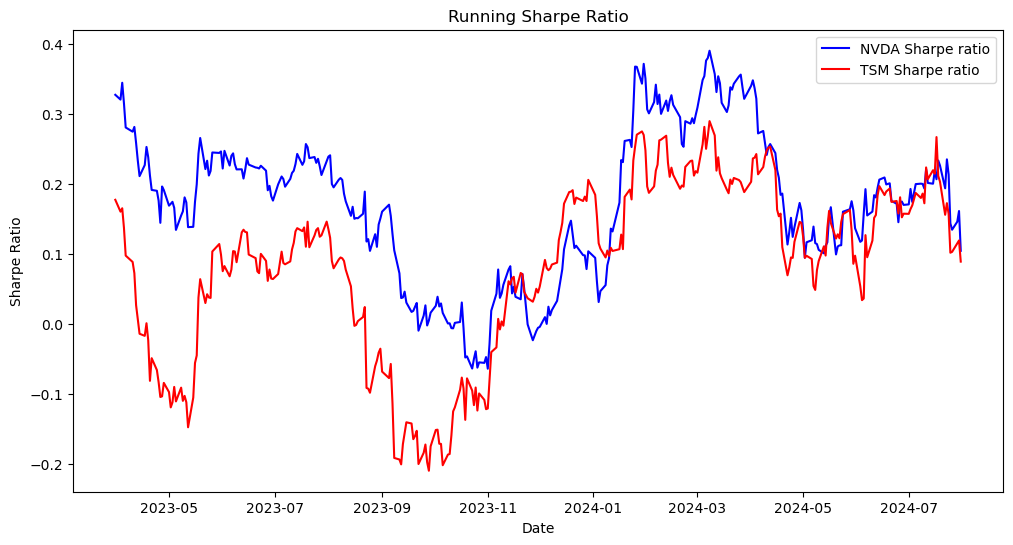

In [4]:

df_bil_returns = df['BIL'].pct_change().dropna()
df_nvda_returns = df['NVDA'].pct_change().dropna()
df_tsm_returns = df['TSM'].pct_change().dropna()


def sharpe_ratio(asset_returns, risk_free_rate):
    excess_returns = asset_returns - risk_free_rate
    avg_excess_return = np.mean(excess_returns)
    std_excess_return = np.std(excess_returns)
    sharpe_ratio = (avg_excess_return / std_excess_return)
    return sharpe_ratio


running_sharpe_ratio_nvda = [ 
    sharpe_ratio( df_nvda_returns[ i - 60 :  i]  , df_bil_returns[ i - 60 :i]  ) 
    for i in range(60 , len(df_nvda_returns)) 
    ]

running_sharpe_ratio_tsm = [ 
    sharpe_ratio( df_tsm_returns[ i - 60 :  i]  , df_bil_returns[ i - 60 :i]  ) 
    for i in range(60 , len(df_nvda_returns)) 
    ]



df_sharpe = pd.DataFrame({
    'Date': df_nvda_returns.index[60:],
    'NVDA': running_sharpe_ratio_nvda,
    'TSM': running_sharpe_ratio_tsm
}).set_index('Date')


fig, axis = plt.subplots(figsize=(12, 6))

axis = sns.lineplot(data=df_sharpe['NVDA'], label='NVDA Sharpe ratio', color='blue')
axis = sns.lineplot(data=df_sharpe['TSM'], label='TSM Sharpe ratio', color='red')


plt.title('Running Sharpe Ratio')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')


plt.show()



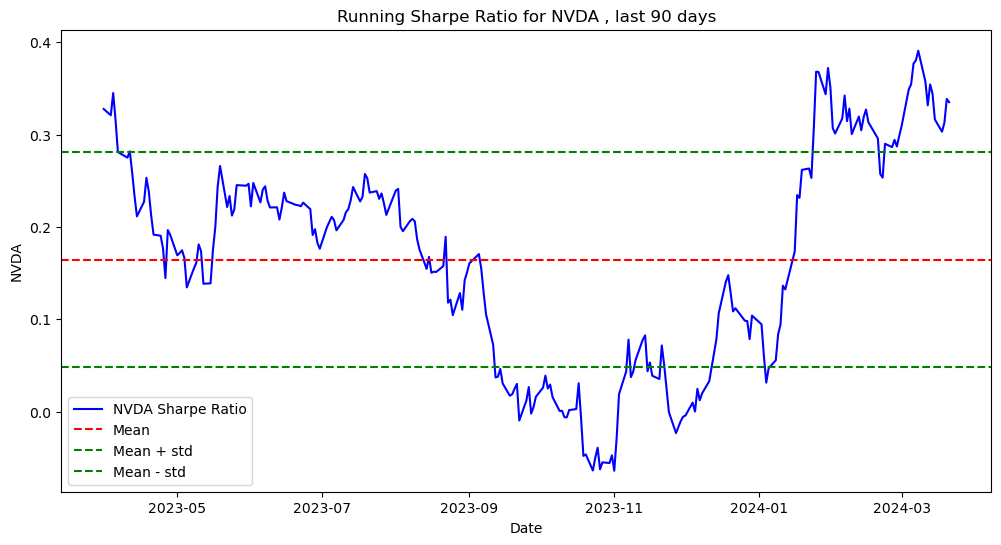

mean of running sharpe ratio for NVDA for the last 90 days is :  0.16476558441447042
Standard deviation of running sharpe ratio for NVDA for the last 90 days is :  0.11620721815458296


In [5]:
#  running shape ratio for the last 90 days

mean_rs_nvda = np.mean(running_sharpe_ratio_nvda[:-90])
std_rs_nvda =  np.std( running_sharpe_ratio_nvda[:-90])

fig , axis = plt.subplots(figsize=(12,6))

axis =  sns.lineplot( y=df_sharpe['NVDA'][:-90] , x = df_sharpe.index[:-90] , label='NVDA Sharpe Ratio' , color='blue')

axis.axhline(mean_rs_nvda , color='red' , linestyle='--' , label='Mean')

axis.axhline(mean_rs_nvda + std_rs_nvda , color='green' , linestyle='--' , label='Mean + std')

axis.axhline(mean_rs_nvda - std_rs_nvda , color='green' , linestyle='--' , label='Mean - std')

axis.legend()

plt.title('Running Sharpe Ratio for NVDA , last 90 days')

plt.show()

print('mean of running sharpe ratio for NVDA for the last 90 days is : ' , mean_rs_nvda)
print('Standard deviation of running sharpe ratio for NVDA for the last 90 days is : ' , std_rs_nvda)


The standard deviation in this case is about a quarter of the range, so this data is extremely volatile.

### Moving Average

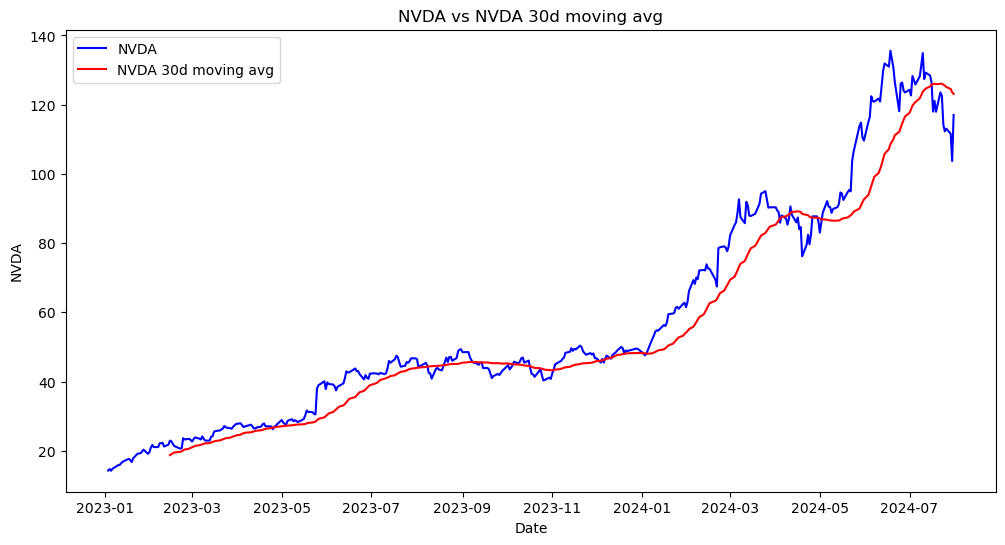

Mean of the 30d moving average of NVDA is :  56.18201340797492
Standard deviation of the 30d moving average of NVDA is :  28.83642613571678


In [6]:
df.head(3)

df['NVDA_30d_moving_avg'] = df['NVDA'].rolling(window=30).mean()


fig , axis =  plt.subplots( figsize=(12,6))

axis  = sns.lineplot( y=df['NVDA'] , x=df.index , label='NVDA' , color='blue')

axis = sns.lineplot( y=df['NVDA_30d_moving_avg'] , x=df.index , label='NVDA 30d moving avg' , color='red')

plt.title('NVDA vs NVDA 30d moving avg')

plt.show()


# understanding the stability of the moving average mean

rolling_avg_mean = df['NVDA_30d_moving_avg'].mean()
rolling_avg_std = df['NVDA_30d_moving_avg'].std()

print('Mean of the 30d moving average of NVDA is : ' , rolling_avg_mean)
print('Standard deviation of the 30d moving average of NVDA is : ' , rolling_avg_std)



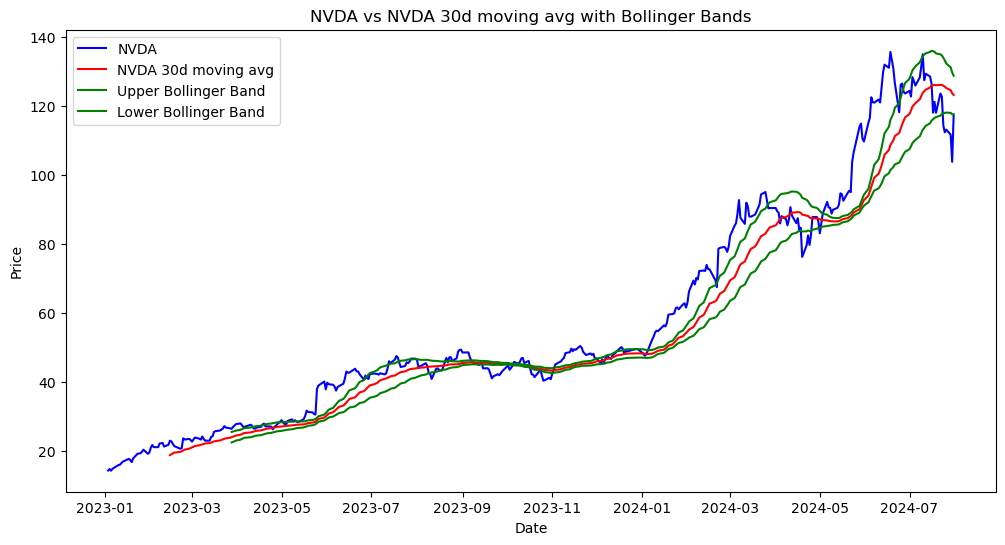

In [7]:
# to understand what the changes mean for the data set its time to plot it all along side the bollinger bands



rolling_avg_std = df['NVDA_30d_moving_avg'].rolling(30).std()



fig , axis = plt.subplots(figsize=(12,6))


axis = sns.lineplot( y=df['NVDA'] , x=df.index , label='NVDA' , color='blue')

axis = sns.lineplot( y=df['NVDA_30d_moving_avg'] , x=df.index , label='NVDA 30d moving avg' , color='red')

axis =  sns.lineplot( y=df['NVDA_30d_moving_avg'] + rolling_avg_std , x=df.index , label='Upper Bollinger Band' , color='green')

axis = sns.lineplot( y=df['NVDA_30d_moving_avg'] - rolling_avg_std , x=df.index , label='Lower Bollinger Band' , color='green')


axis.set_xlabel('Date')
axis.set_ylabel('Price')

axis.set_title('NVDA vs NVDA 30d moving avg with Bollinger Bands')

plt.legend()

plt.show()


